# Salary Estimation using K-Nearest Neighbour (K-NN)

This script builds a K-NN classifier to predict whether an employee's salary is above or below 50K 
based on features like age, education level, capital gain, and working hours per week.
It includes data preprocessing, model training, error analysis across different K values, and user prediction input.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:

# Load dataset and display top rows
dataset = pd.read_csv('data/2knn_salary_estimation.csv')
dataset.head(5)


,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [4]:

# Convert categorical 'income' column into binary format (0 = <=50K, 1 = >50K)
income_map = {'<=50K': 0, '>50K': 1}
dataset['income'] = dataset['income'].map(income_map).astype(int)

In [5]:
# Separate features (X) and label (Y)
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

In [6]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [7]:
# Standardize features for better distance calculations in K-NN
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# Determine optimal K by comparing prediction error rates
error = []
for i in range(1, 40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
optimal_k = error.index(min(error)) + 1

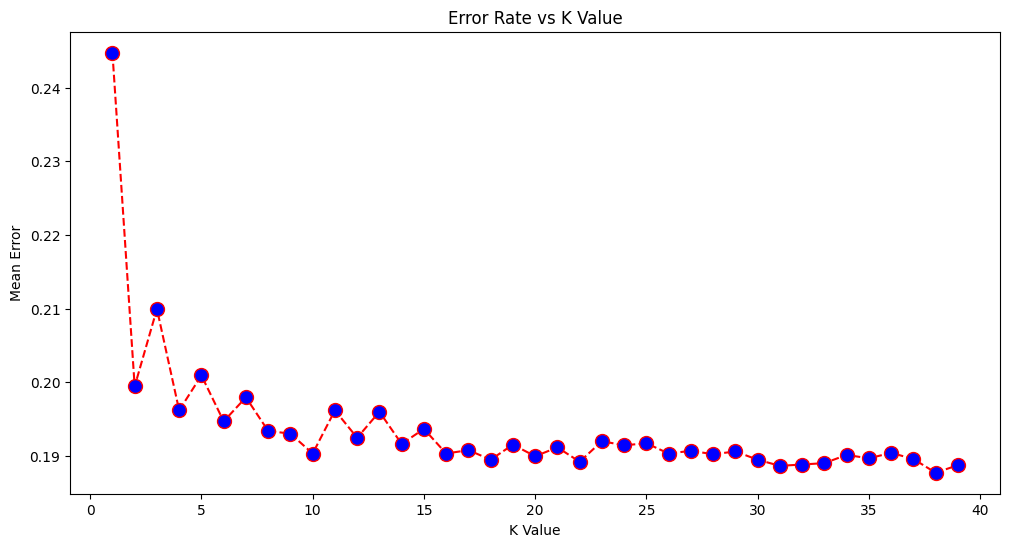

In [9]:
# Plot error rate vs K value
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [10]:
# Train final model using the optimal K value
model = KNeighborsClassifier(n_neighbors=optimal_k, metric='minkowski', p=2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=38)

In [11]:
# Accept input for a new employee's features and predict salary range
age = int(input("Enter New Employee's Age: "))
edu = int(input("Enter New Employee's Education Level (numeric): "))
cg = int(input("Enter New Employee's Capital Gain: "))
wh = int(input("Enter New Employee's Hours per Week: "))
new_emp = sc.transform([[age, edu, cg, wh]])
result = model.predict(new_emp)

In [12]:
# Evaluate model performance on test data
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred) * 100


In [13]:

# Display confusion matrix and accuracy
print("Confusion Matrix: ")
print(cm)
print(f"Accuracy of the Model: {accuracy:.2f}%")

Confusion Matrix: 
[[7676  456]
 [1561 1053]]
Accuracy of the Model: 81.23%
